In [3]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [27]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [29]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [31]:
# Convert date to datetime

df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# This is the additional data format change code, If only run the above code, getting an error
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], format='%d/%m/%Y', errors='coerce')


# Define the start and end dates
start_date = '2008-01-01'
end_date = '2012-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2008_2012 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
#df_uk_2008_2012.dtypes
df_uk_2008_2012.head()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_20684\2970276317.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
218,2008-01-01,9881.75,5488.98,5.375000,2.2,3063.34,3624.20,100.549835,162.975,-13.0,107.04213,171.504,106.201720,781.964,5.2,3.8,0.5,-0.007201
219,2008-02-01,10067.93,5594.87,5.250000,2.5,3073.00,3648.14,101.080590,163.862,-17.0,106.70992,171.740,105.680695,781.502,5.2,3.6,0.5,0.045560
220,2008-03-01,10013.24,5581.66,5.125000,2.5,2988.28,3577.41,101.260895,164.798,-19.0,107.05124,173.050,105.604810,784.100,5.3,4.1,-0.5,0.175849
221,2008-04-01,10122.28,5679.93,5.000000,3.0,3167.22,3804.06,100.688210,164.468,-24.0,104.64431,169.940,103.380400,771.036,5.2,4.6,-0.5,0.175849
222,2008-05-01,10049.34,5657.73,4.916667,3.3,3148.94,3796.33,100.018920,164.014,-29.0,102.24722,166.786,101.111850,757.380,5.4,4.7,-0.5,-0.010290


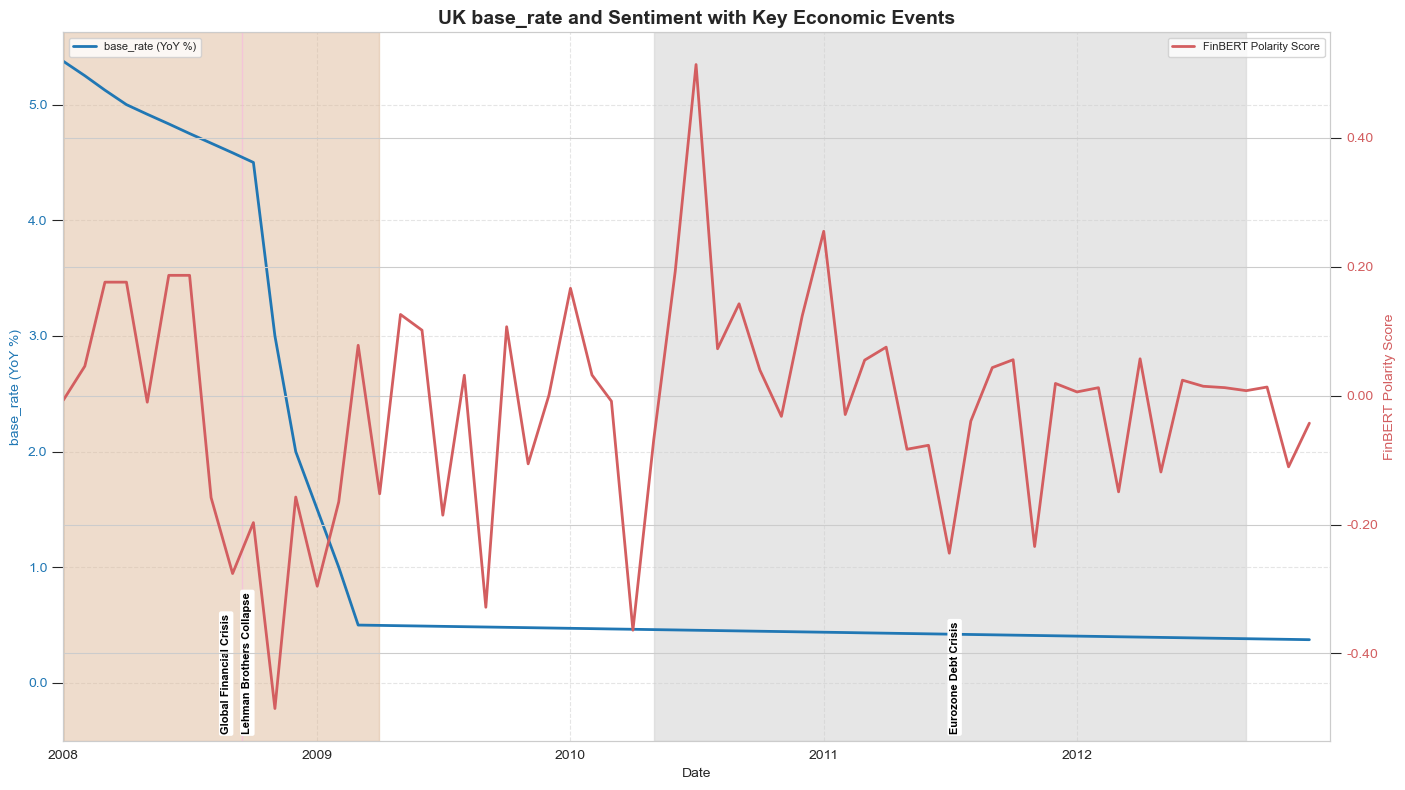

In [33]:
# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_base_rate = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

* From 2008 to early 2009, the base rate dropped steeply from above 5% to near 0.5%.
* It remained flat at around 0.5% for several years through 2012.
* The Bank of England responded to the 2008 financial crisis with aggressive rate cuts to stimulate the economy.

### Visual analysis shows that BoE base rate Y-o-Y percentage change tends to move inversely to the finBERT sentiment scores. Also significant movements in both CPI and sentiment scores tend to take place where there are key economic events which directly impact on the UK economy (e.g. the Global Financial Crisis, Eurozone Debt Crisis, Brexit and Covid-19.

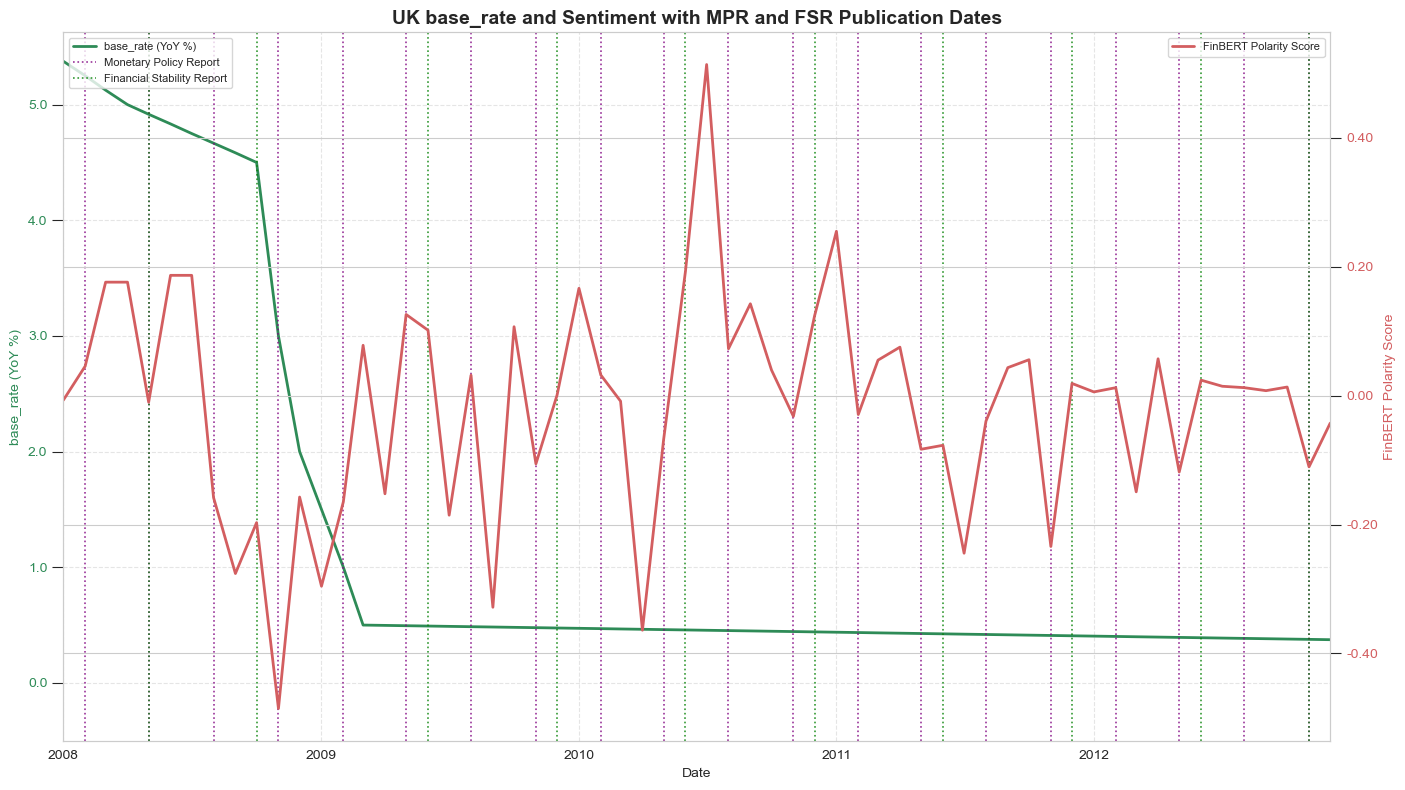

In [37]:

start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['base_rate', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# base_rate Line (Left Axis)
color_base_rate = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('base_rate (YoY %)', color=color_base_rate, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['base_rate'], color=color_base_rate, label='base_rate (YoY %)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_base_rate, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK base_rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

### UK Base Rate Trend:
* Sharp decline from over 5% in 2008 to around 0.5% by early 2009.
* Remained flat (near 0.5%) from 2009 through 2012 — indicating an extended period of monetary easing.

### FinBERT Polarity Score Trend:
* Volatile throughout the period, with multiple sharp spikes and dips.
* Deep sentiment drop during the 2008–2009 crisis, partial recovery, but still negative-to-neutral sentiment persists through 2012.

### Insights:

### 1. Policy Decisions (Rate Cuts) Precede or Coincide with Major Negative Sentiment:

* Significant rate drops occurred during heightened negative sentiment, especially around the Global Financial Crisis.

### 2. Reports Are Frequent During Volatility:

* During 2008–2010, both MPRs and FSRs are published frequently — consistent with crisis management communication.

### 3. Sentiment Reactivity:

* Some spikes in sentiment (positive or negative) align closely with publication dates, suggesting market/media reactions to report content.

### 4. Flat Rate, Persistently Mixed Sentiment:

* From 2009 onward, although base rate remains unchanged, sentiment continues fluctuating — reflecting ongoing economic uncertainty despite stable monetary policy.

### Summary
It suggests that while monetary policy stabilized after the 2008 crisis, sentiment remained volatile, highlighting the complex and lagging relationship between policy signaling and market perception.

### Drop unncessary columns to reduce the number of variables to be explored

In [44]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2008_2012.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [47]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [49]:
# Define the new order of the columns
new_column_order = [
    'Date', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
218,2008-01-01,2.2,-0.007201,-13.0,5.2,3.8,0.5,5488.98,5.375000,162.975
219,2008-02-01,2.5,0.045560,-17.0,5.2,3.6,0.5,5594.87,5.250000,163.862
220,2008-03-01,2.5,0.175849,-19.0,5.3,4.1,-0.5,5581.66,5.125000,164.798
221,2008-04-01,3.0,0.175849,-24.0,5.2,4.6,-0.5,5679.93,5.000000,164.468
222,2008-05-01,3.3,-0.010290,-29.0,5.4,4.7,-0.5,5657.73,4.916667,164.014


# Correlation analysis

### Create pairplot for visual correlation analysis

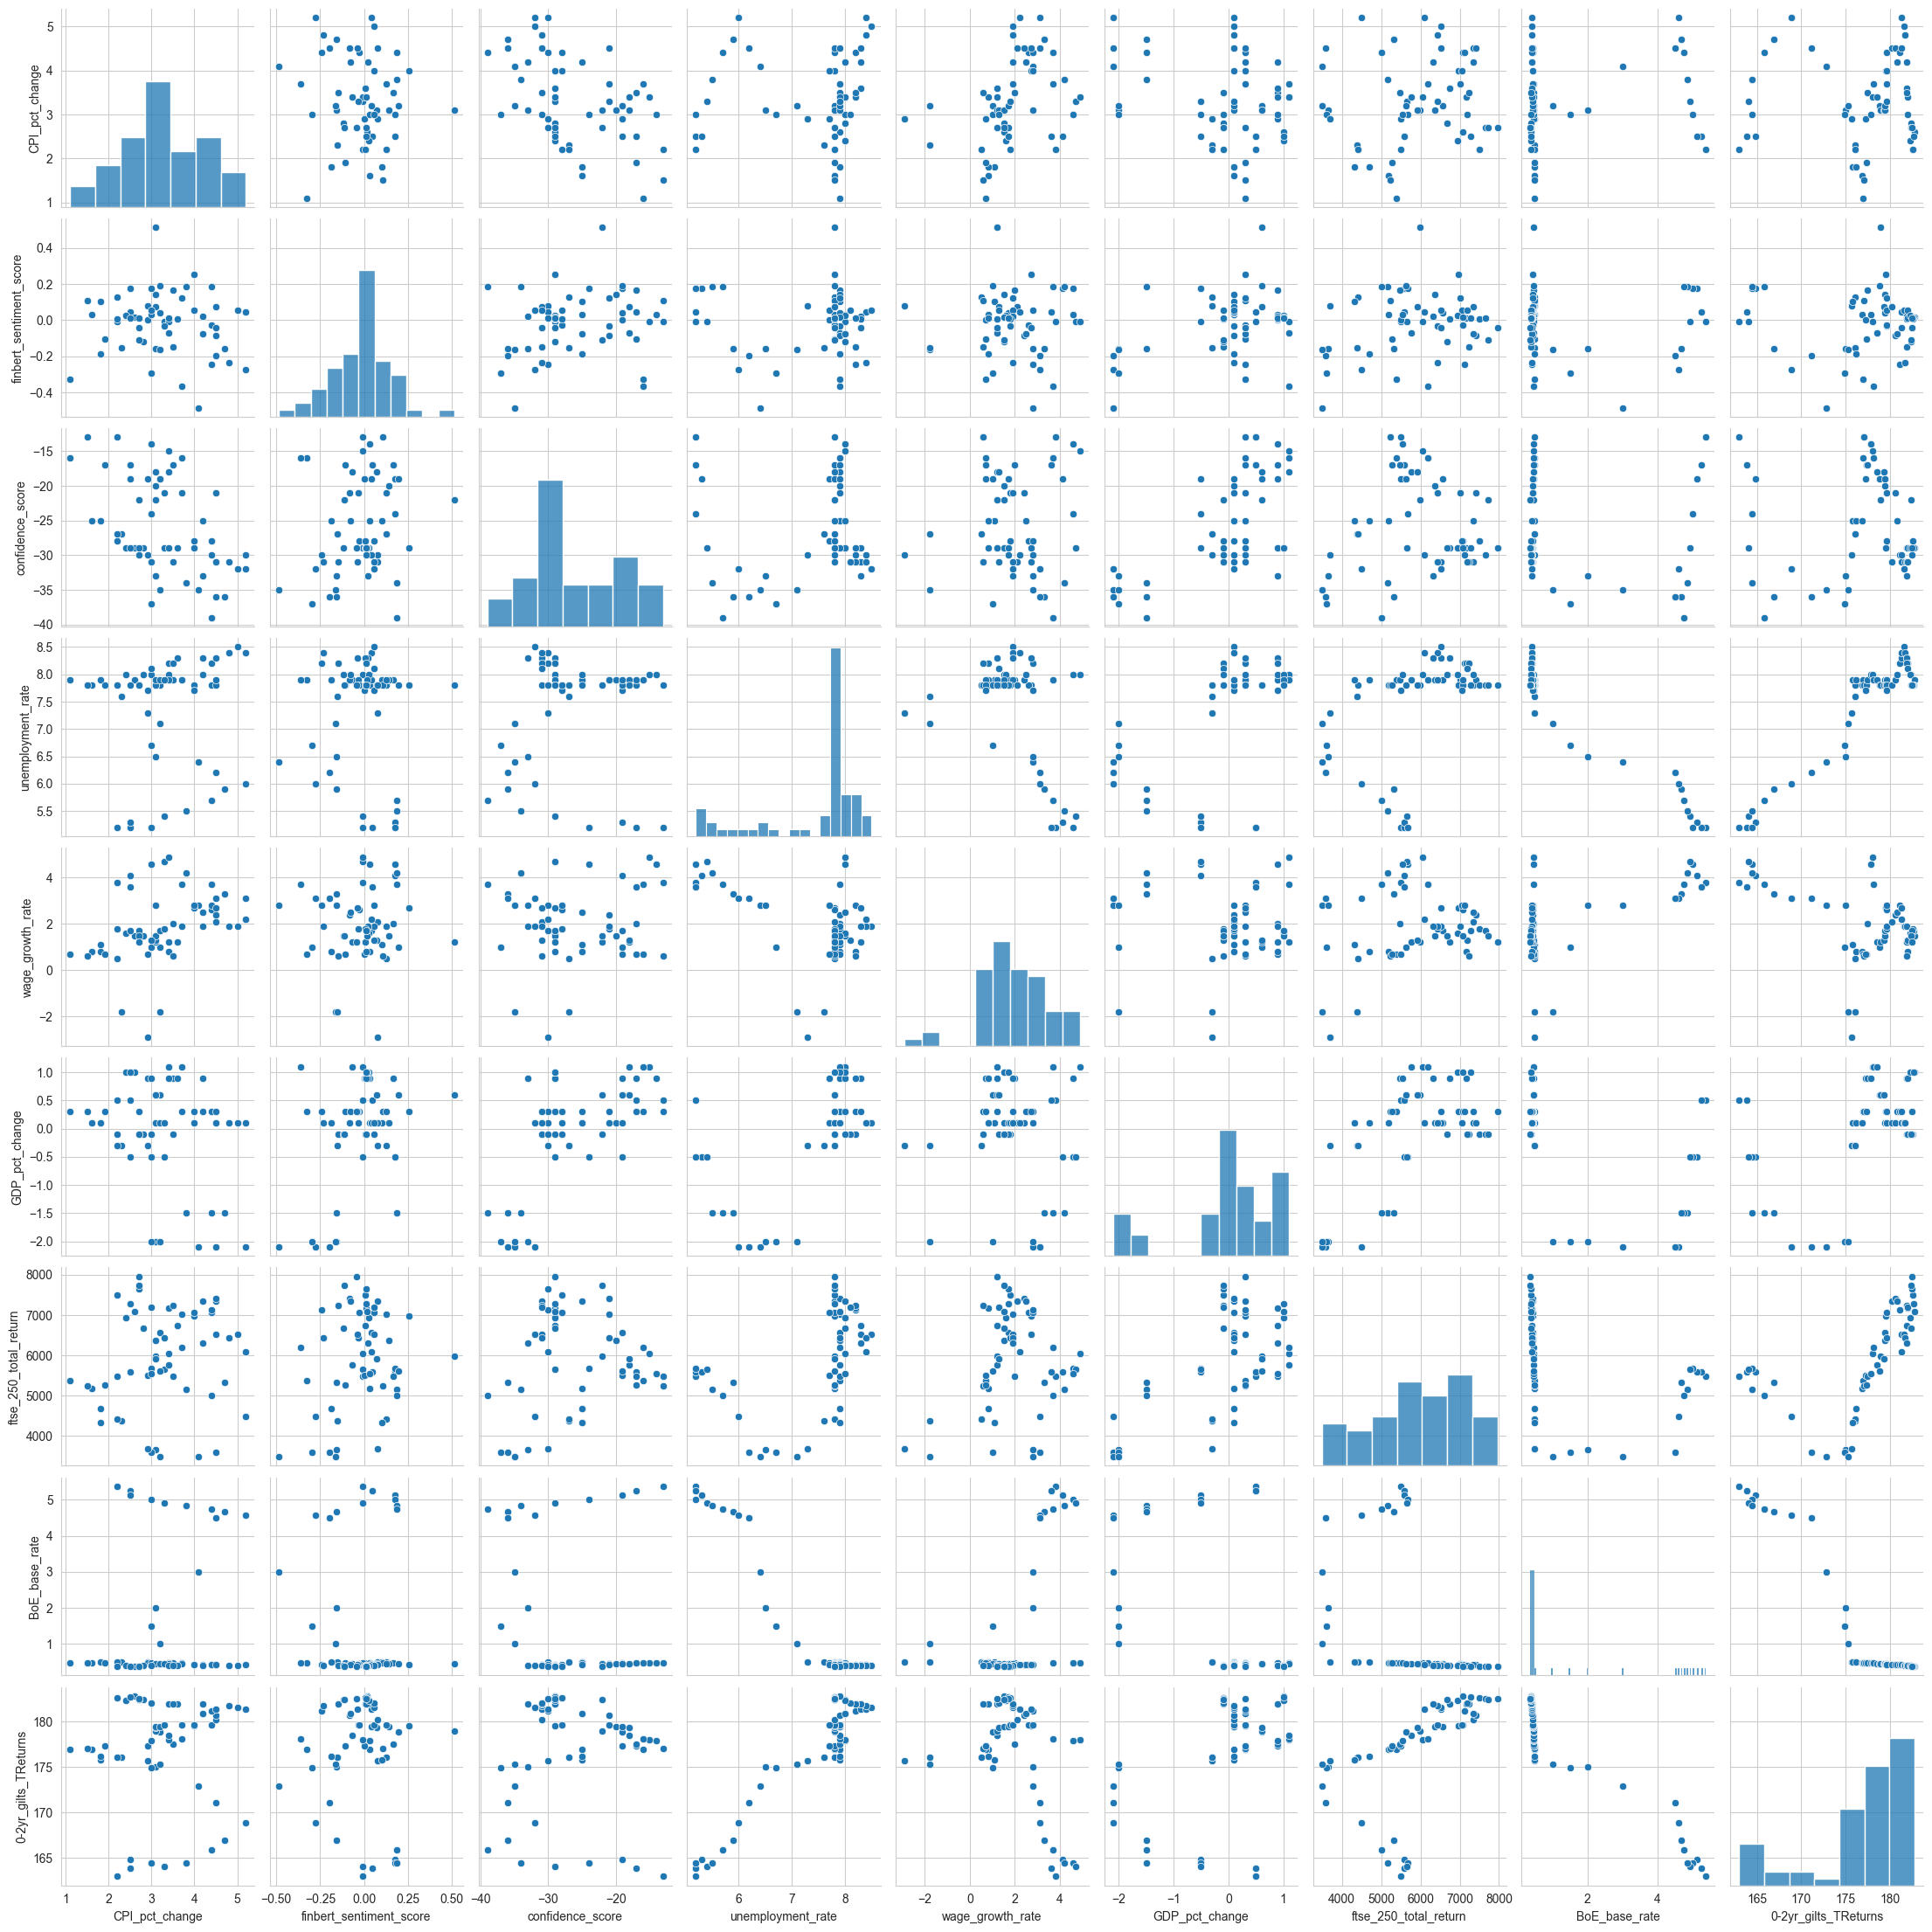

In [11]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

### Create correlation matrices

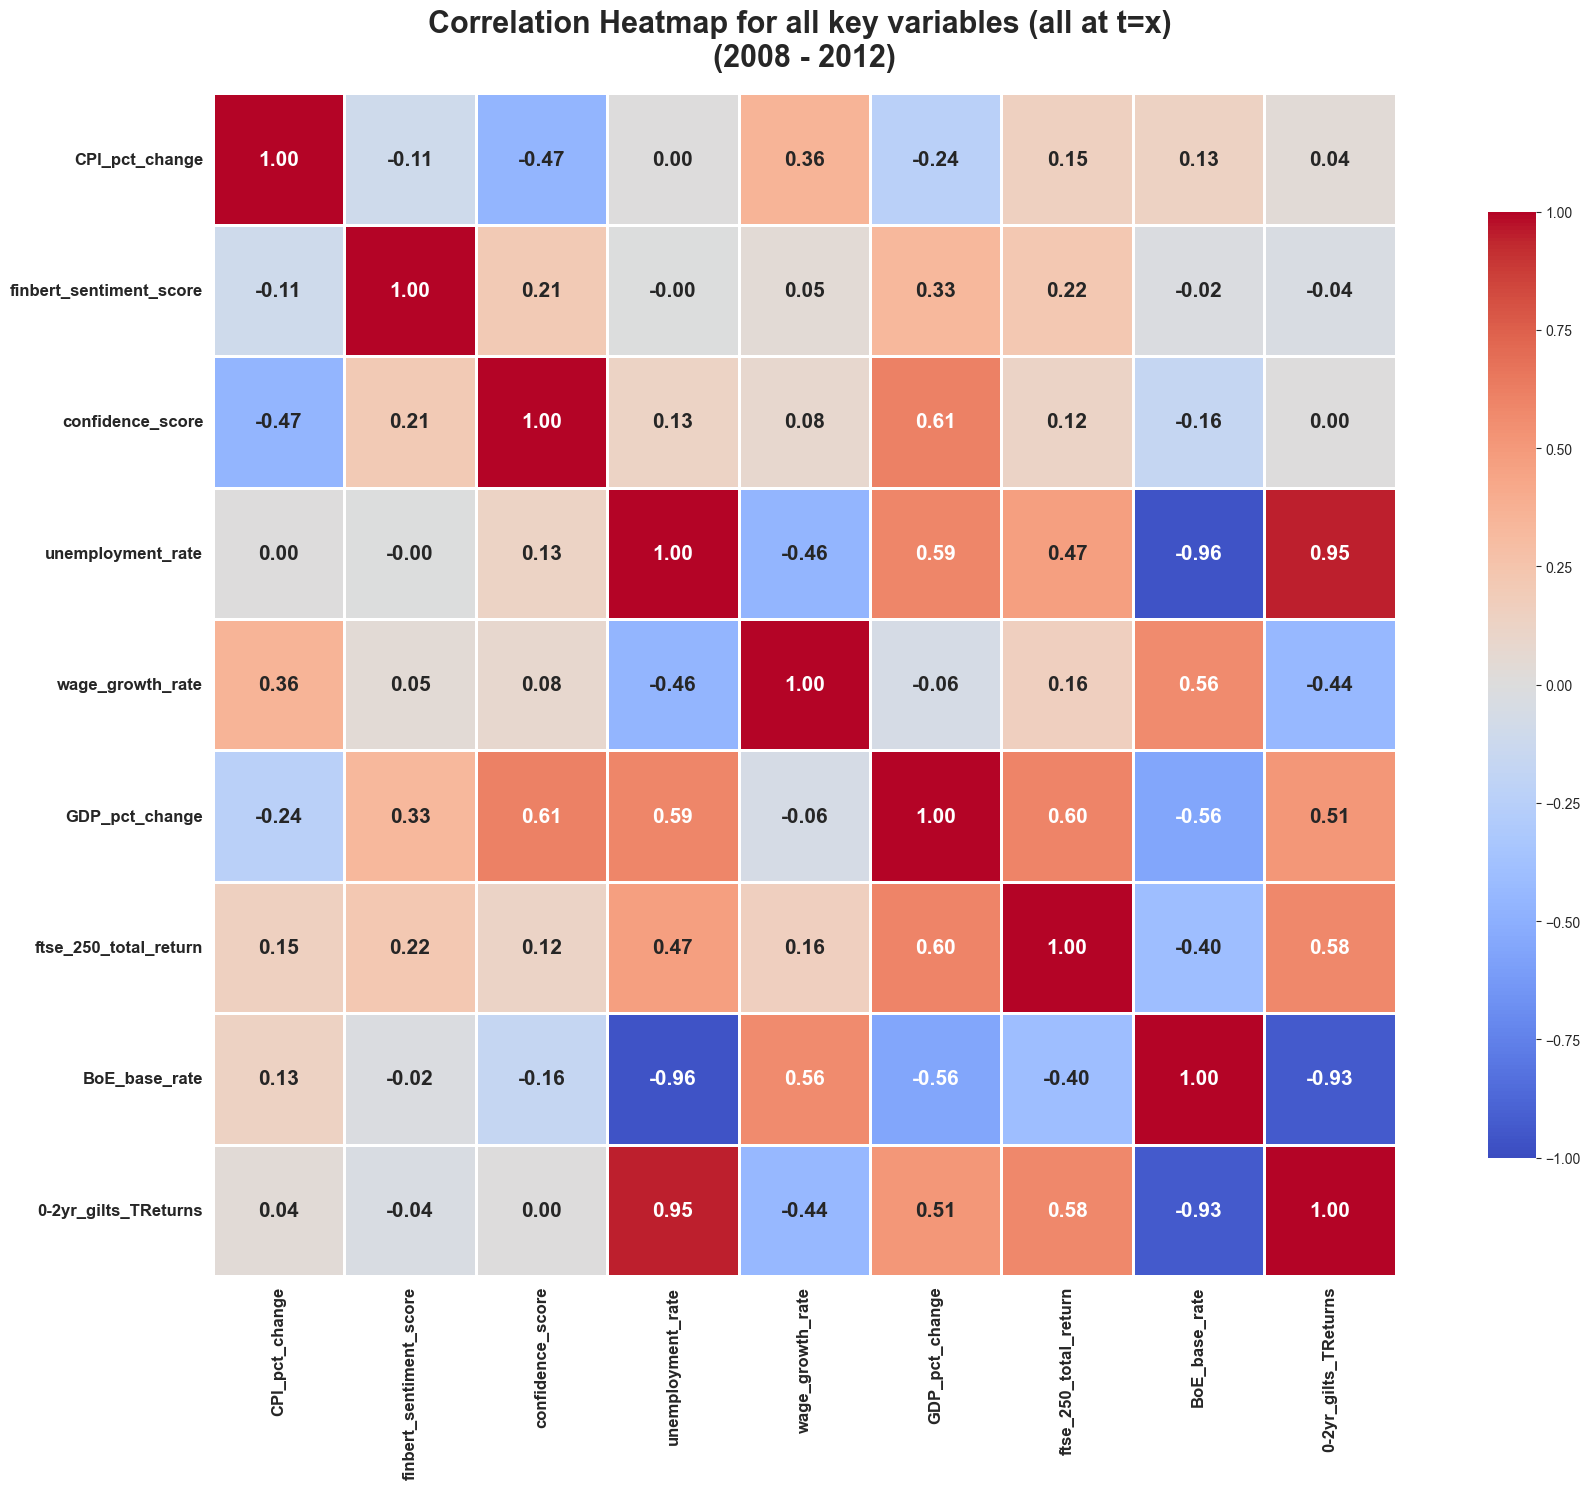

In [12]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(2008 - 2012)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

### BoE Base Rate Relationships

### Strong Negative Correlation with:

0-yr_gilts_TRReturns (−0.93): Falling base rates lead to rising gilt prices (bond yields drop → prices rise).

unemployment_rate (−0.96): Rates are often cut in response to rising unemployment.

### Strong Positive Correlation with:

wage_growth_rate (0.56): Higher rates tend to appear when wages are rising, possibly to curb inflation.

Negative with GDP (−0.56): Higher interest rates may slow economic growth.

## 2. GDP_pct_change
Positively correlates with:

confidence_score (0.61)

0-yr_gilts_TRReturns (0.51)

ftse_250_total_return (0.60)

finbert_sentiment_score (0.33)

As expected, stronger GDP growth aligns with better sentiment, equity returns, and investor confidence.

### 3. FTSE 250 Total Return
Strong positive correlation with:

GDP_pct_change (0.60)

0-yr_gilts_TRReturns (0.58)

unemployment_rate (0.47) — somewhat surprising, may indicate lagging effect or specific period behavior.

Negative with BoE_base_rate (−0.40) — lower rates can support equity markets.

### 4. Confidence and Sentiment Metrics
confidence_score is:

Moderately correlated with GDP (0.61), unemployment_rate (0.59), ftse_250_total_return (0.12).

finbert_sentiment_score is:

Weakly to moderately correlated with GDP (0.33), and confidence_score (0.21).

Shows little/no correlation with BoE_base_rate or unemployment_rate.

### 5. Unemployment
Strong positive correlation with:

0-yr_gilts_TRReturns (0.95)

Indicates that government bonds tend to perform well during times of high unemployment (flight to safety).

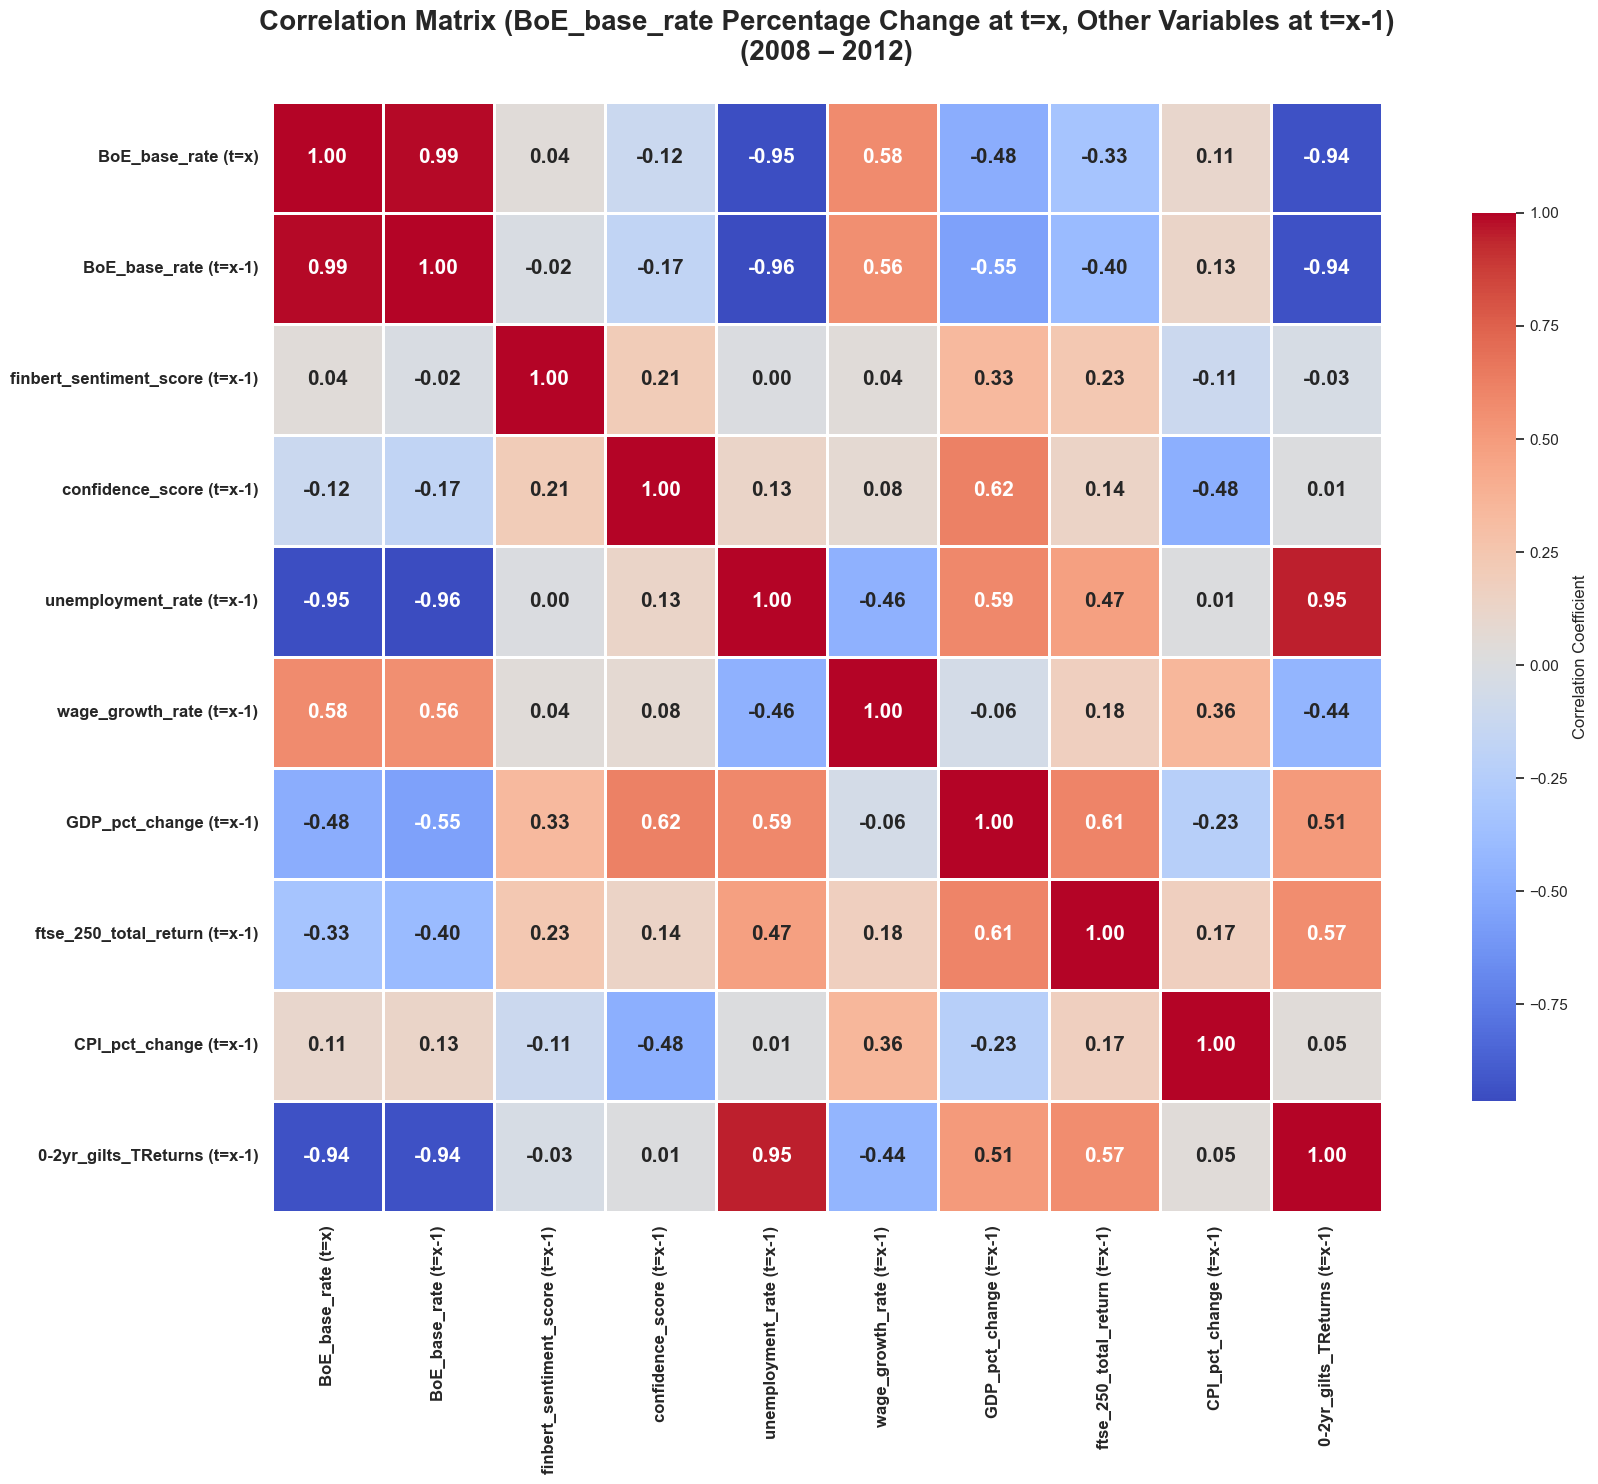

In [13]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-1)\n(2008 – 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### BoE Base Rate (t) and Prior Economic Indicators (t−1):
### Strong Negative Correlation with:

### Unemployment rate (−0.95):
➤ As unemployment increased, the BoE lowered interest rates aggressively — a textbook counter-cyclical policy.

### 2-yr Gilts TRReturns (−0.94):
➤ Strong inverse link, indicating gilts rallied ahead of rate cuts (prices rise as yields fall).

### GDP growth (−0.48):
➤ Slowing GDP in the prior period correlated with rate reductions.

### FTSE 250 returns (−0.33):
➤ Weak equity performance preceded rate cuts, reflecting worsening economic sentiment.

### Strong Positive Correlation with:

### Wage growth (0.58):
➤ Somewhat surprising; may reflect earlier tightening before crisis or residual multicollinearity. Alternatively, BoE was slower to react early in the downturn.

### BoE base rate at t−1 (0.99):
➤ Reflects persistence — rate changes were incremental or adjusted gradually.

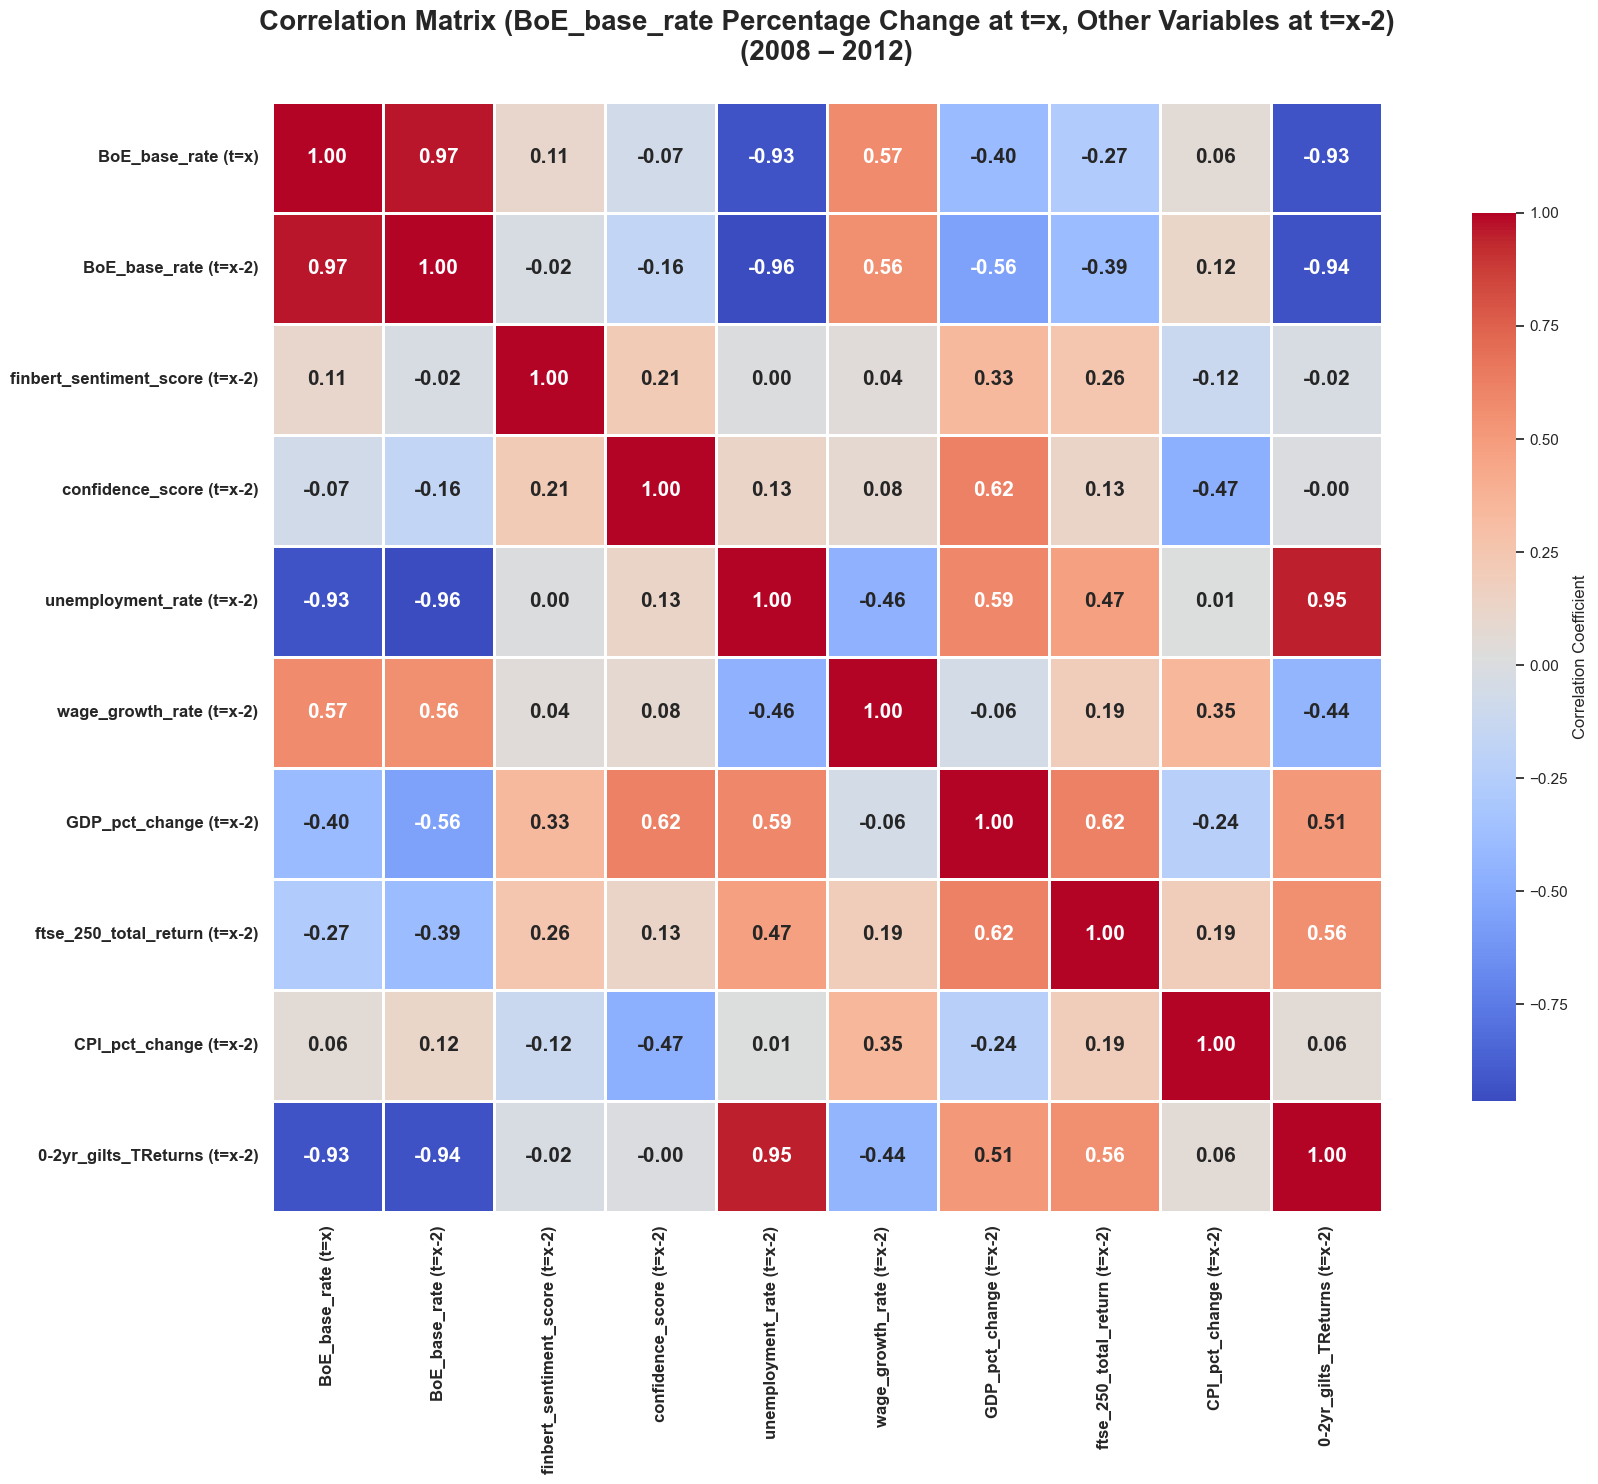

In [14]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-2)\n(2008 – 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

### Key Observations:
### BoE_base_rate (t) vs. Economic Indicators at t−2:
### Strong Negative Correlation:

Unemployment rate (−0.93)
* High unemployment two periods earlier is strongly linked to current rate cuts.

2-yr Gilts Total Returns (−0.93)
* Bonds rallied in advance of rate cuts, suggesting market foresight of BoE easing.

BoE_base_rate at t−2 (0.97)
* Again confirms persistence: base rate doesn't change dramatically between periods.

### Positive Correlation:
Wage growth (0.57)
* Similar to the previous lag, possibly reflecting earlier conditions prompting later tightening.

GDP growth (−0.40)
* Weaker GDP growth two periods earlier precedes rate cuts.

## FinBERT sentiment score (t−2): 0.11
* Slightly higher than at t−1, but still weakly predictive of rate changes.
* Confidence score (t−2): −0.07.Essentially no meaningful relationship.

This reinforces that hard economic data was more influential on rate-setting than sentiment metrics, at least during 2008–2012.

### During 2008–2012:

### BoE rate decisions were highly reactive to fundamental lagged indicators, especially:

### Unemployment (very strong)

Gilt returns (bond market expectations)

GDP weakness

### Sentiment and confidence scores were not strong predictors — possibly due to the magnitude and structural nature of the crisis.

The consistent negative correlations across both t−1 and t−2 lags show that BoE policy was systematically counter-cyclical.



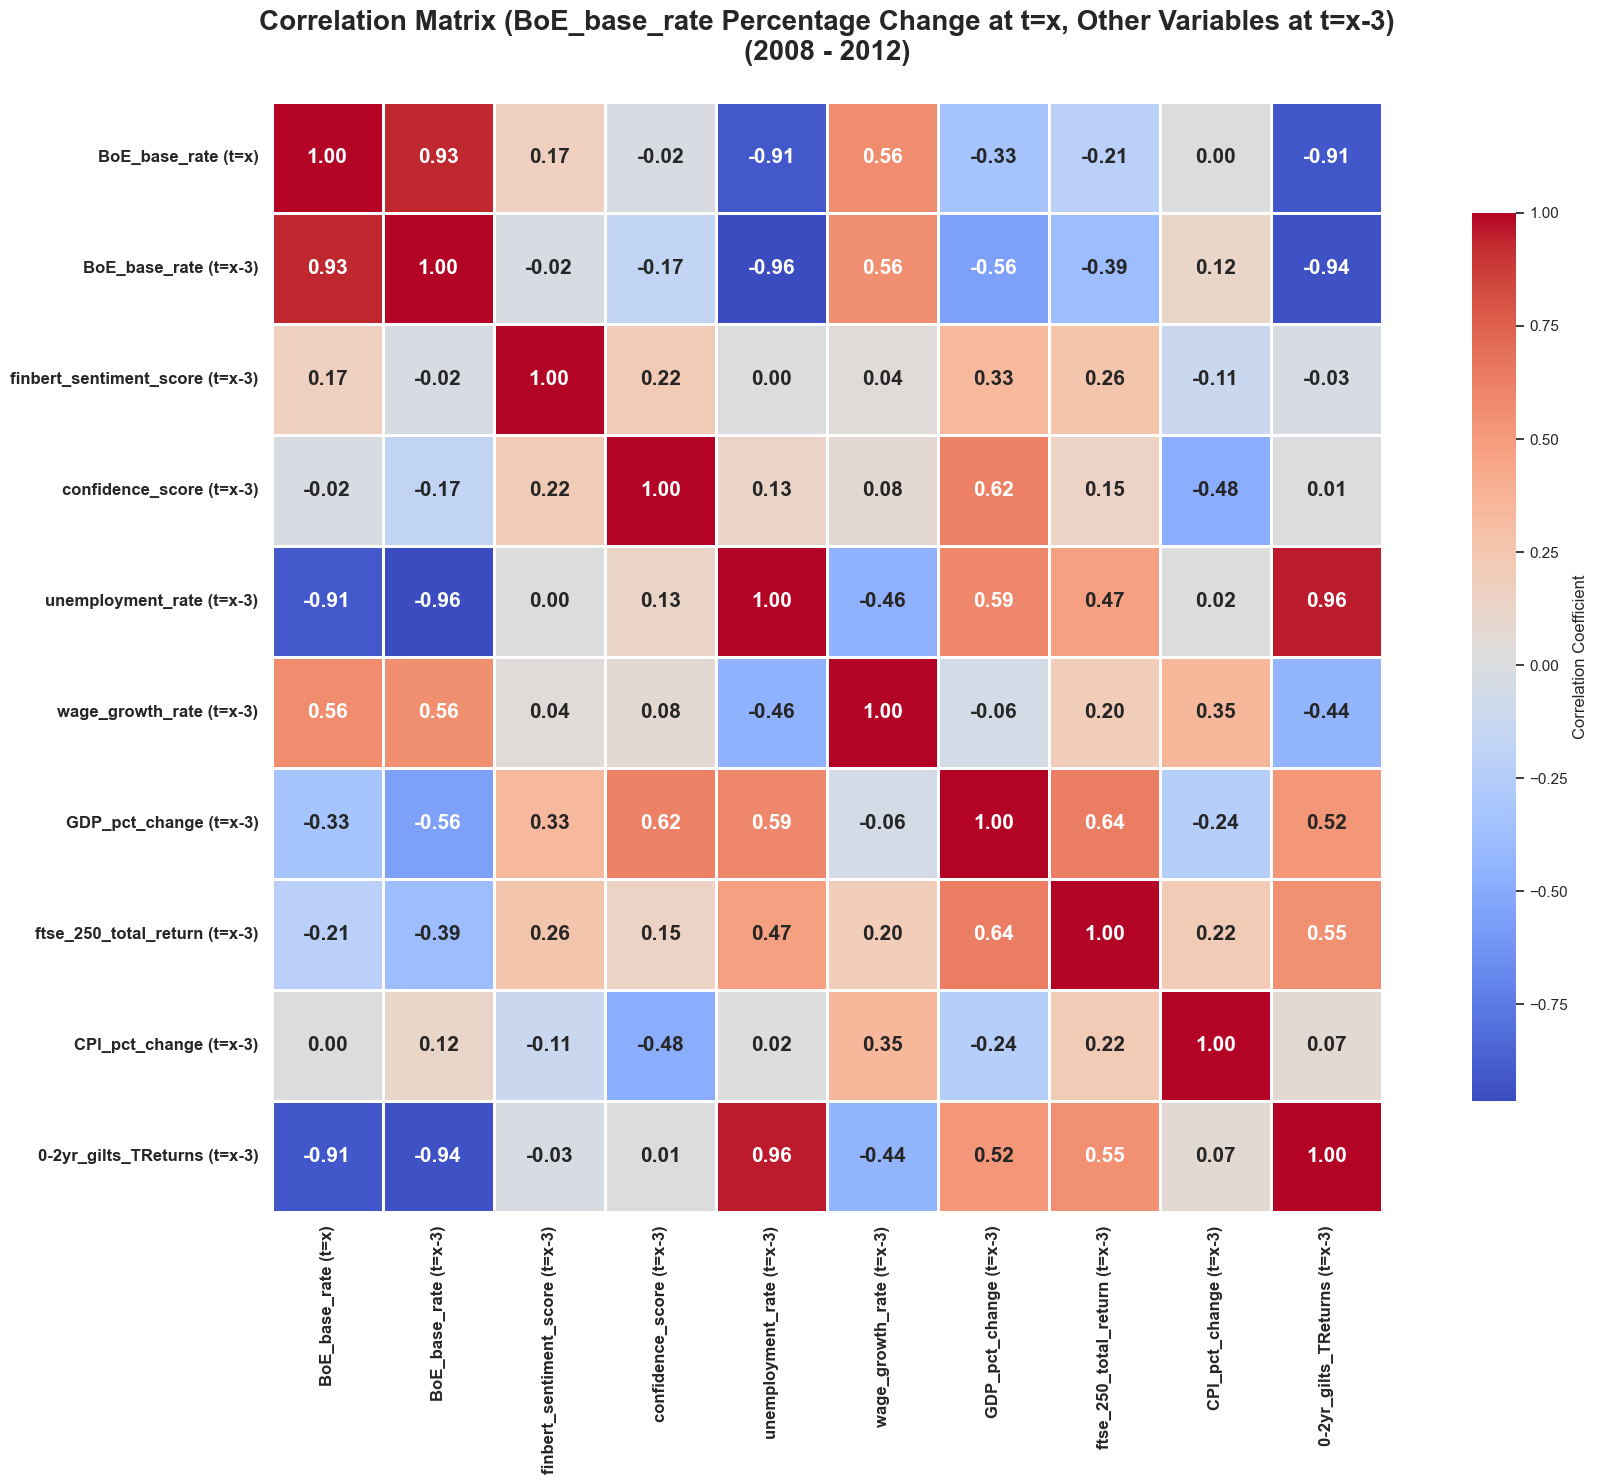

In [15]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'BoE_base_rate', 'finbert_sentiment_score', 'confidence_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'CPI_pct_change', '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['BoE_base_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'BoE_base_rate': 'BoE_base_rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (BoE_base_rate Percentage Change at t=x, Other Variables at t=x-3)\n(2008 - 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


### Key Insights:
### BoE_base_rate (t) vs. Variables at t−3:
### Strong Negative Correlation with:
Unemployment rate (−0.91)

➤ Consistently the strongest signal across all lags (t−1 to t−3).

➤ Suggests that the BoE persistently responded to rising unemployment with rate cuts even 3 periods later.

2-yr Gilts TRReturns (−0.91)

➤ The bond market tends to react ahead of policy moves, showing foresight of easing.

GDP growth (−0.33)

➤ Weak growth 3 periods prior is still linked with rate cuts.

### Positive Correlation with:
Wage growth (0.56)

➤ Same pattern seen at t−1 and t−2, possibly indicating the policy environment pre-crisis or as an indirect inflation signal.

### Sentiment & Confidence (t−3):

FinBERT Sentiment (0.17):

➤ Weak, slightly more positive than earlier lags, but still not a strong driver of rate changes.

Confidence Score (−0.02):

➤ Essentially uncorrelated — confidence 3 months earlier has no direct influence on BoE decisions in this timeframe.

### Inter-Market Relationships at t−3:
Unemployment ↔ Gilts (0.96):

➤ Very tight inverse relationship: bad job data → bond market rally.

GDP growth ↔ Confidence (0.62), FTSE 250 (0.64):

➤ Solid positive correlations: GDP drives confidence and equity returns.

### Summary:
BoE Rate Decisions at t Were:
Heavily driven by lagged unemployment and bond market signals — even up to three periods back.

Only modestly influenced by GDP and wage growth.

Largely unaffected by sentiment indicators like FinBERT or confidence scores.

This shows that during crisis years (2008–2012), the Bank of England's interest rate decisions were strongly reactive to hard lagging macroeconomic indicators, especially unemployment, rather than leading or soft sentiment data.

### From the above matrices, the variables that best correlate with BoE_base_rate at t=0 are unemployment_rate (t−1), GDP_pct_change (t−1), wage_growth_rate (t−1)

### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

### Dependent variable:

BoE_base_rate_change (t)

### Independent variables:

- BoE_base_rate (t=x-1)

- unemployment_rate (t=x-1)

- 0-2yr_gilts_TReturns (t=x-1)

- wage_growth_rate (t=x-1)

- GDP_pct_change (t=x-1)

# Multiple linear regression: BoE_base_rate_change (t) vs BoE_base_rate (t=x-1) , unemployment_rate (t=x-1), 0-2yr_gilts_TReturns (t=x-1),wage_growth_rate (t=x-1),GDP_pct_change (t=x-1)

### Prepare regression dataframe

In [16]:
df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
218,2008-01-01,2.2,-0.007201,-13.0,5.2,3.8,0.5,5488.98,5.375000,162.975
219,2008-02-01,2.5,0.045560,-17.0,5.2,3.6,0.5,5594.87,5.250000,163.862
220,2008-03-01,2.5,0.175849,-19.0,5.3,4.1,-0.5,5581.66,5.125000,164.798
221,2008-04-01,3.0,0.175849,-24.0,5.2,4.6,-0.5,5679.93,5.000000,164.468
222,2008-05-01,3.3,-0.010290,-29.0,5.4,4.7,-0.5,5657.73,4.916667,164.014


In [17]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['unemployment_rate (t=x-1)'] = filtered_df['unemployment_rate'].shift(1)
regression_df['0-2yr_gilts_TReturns (t=x-1)'] = filtered_df['0-2yr_gilts_TReturns'].shift(1)
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(1)
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,BoE_base_rate (t=x),BoE_base_rate (t=x-1),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x-1),wage_growth_rate (t=x-1),GDP_pct_change (t=x-1)
BoE_base_rate (t=x),1.000000,0.989781,-0.951727,-0.935706,0.575417,-0.481130
BoE_base_rate (t=x-1),0.989781,1.000000,-0.964331,-0.935110,0.562333,-0.554762
unemployment_rate (t=x-1),-0.951727,-0.964331,1.000000,0.949605,-0.462555,0.589230
0-2yr_gilts_TReturns (t=x-1),-0.935706,-0.935110,0.949605,1.000000,-0.436786,0.507725
wage_growth_rate (t=x-1),0.575417,0.562333,-0.462555,-0.436786,1.000000,-0.057160
GDP_pct_change (t=x-1),-0.481130,-0.554762,0.589230,0.507725,-0.057160,1.000000


In [18]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate (t=x-1)', 'unemployment_rate (t=x-1)', '0-2yr_gilts_TReturns (t=x-1)','wage_growth_rate (t=x-1)','GDP_pct_change (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [19]:
# Call the predictions for X (array).
mlr.predict(X)

array([5.36573737, 5.22842212, 4.92274671, 4.80966342, 4.74861216,
       4.49296423, 4.39010784, 4.29418881, 4.07366162, 3.9512238 ,
       2.5118322 , 1.54580721, 1.08601954, 0.6221892 , 0.4401161 ,
       0.44017365, 0.44311728, 0.51922989, 0.50741095, 0.48610253,
       0.51981186, 0.51178944, 0.5015246 , 0.5999117 , 0.59998802,
       0.59213014, 0.62036922, 0.61172634, 0.5997523 , 0.49981789,
       0.49696546, 0.48450637, 0.3982972 , 0.39474351, 0.38741942,
       0.42053675, 0.41538897, 0.41165373, 0.37067809, 0.35876458,
       0.34922071, 0.3802008 , 0.37720624, 0.37400306, 0.33984351,
       0.3358859 , 0.32629527, 0.45218446, 0.44887785, 0.44264191,
       0.26930408, 0.26151697, 0.24673139, 0.43383004, 0.41739253,
       0.41335201, 0.22565296, 0.22481323, 0.22364152])

In [20]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9870127945529128
Intercept:  3.7489587893493486
Coefficients:


[('BoE_base_rate (t=x-1)', np.float64(0.9377576389692474)),
 ('unemployment_rate (t=x-1)', np.float64(0.03404958003892644)),
 ('0-2yr_gilts_TReturns (t=x-1)', np.float64(-0.022621192366341563)),
 ('wage_growth_rate (t=x-1)', np.float64(0.0001527573636781283)),
 ('GDP_pct_change (t=x-1)', np.float64(0.17076360565823795))]

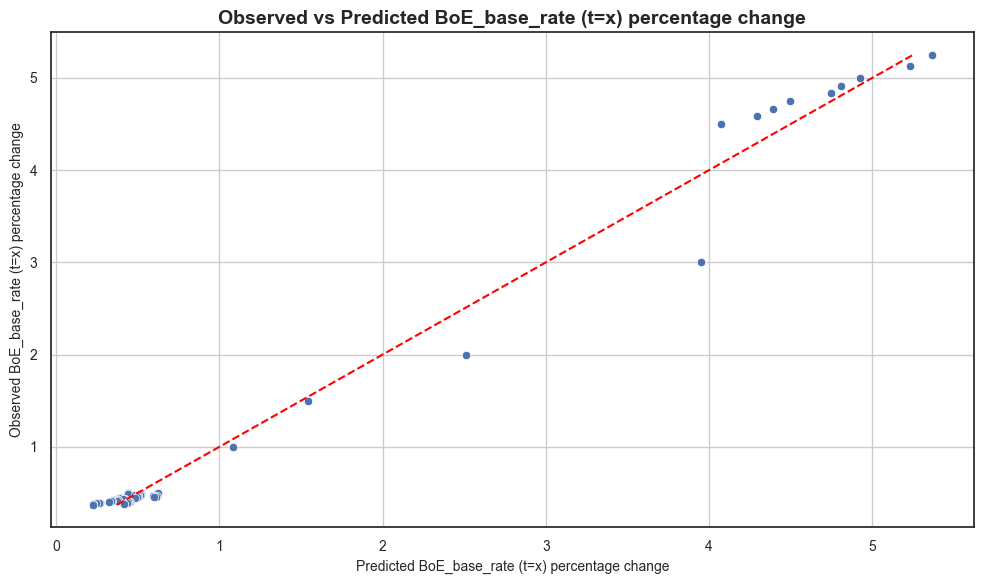

In [21]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate (t=x) percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate (t=x) percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate (t=x) percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretation:

Accuracy: The points lie very close to the red line, especially at lower percentage changes, indicating good predictive performance.

Deviation: At higher percentage changes, there is slightly more dispersion, though still quite close to the red line.

Bias: No strong visual evidence of systematic overprediction or underprediction.


### Training and testing subsets with MLR

In [22]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [23]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     464.7
Date:                 Thu, 22 May 2025   Prob (F-statistic):           5.93e-35
Time:                         16:59:16   Log-Likelihood:                 10.166
No. Observations:                   47   AIC:                            -8.332
Df Residuals:                       41   BIC:                             2.769
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

### <span style="color: orange;">R-squared: 0.983

R-squared: 0.983

Adj. R-squared: 0.981
Extremely high explanatory power — the model explains 98.3% of the variance in the BoE base rate percentage change.

F-statistic: 464.7 (p ≈ 0)
The model is statistically significant overall.


### <span style="color: orange;">  Coefficients & Interpretation:

| BoE_base_rate (t−1) | 0.9332 | 0.000 | Strong, significant predictor. Previous base rate has a high positive influence on current changes. |
| Unemployment_rate (t−x−1) | 0.0268 | 0.867 |  Not significant. |
| 2-yr_gilts_TRetruns (t−x−1) | -0.0227 | 0.227 |  Not significant. |
| Wage_growth_rate (t−x−1) | -0.0072 | 0.809 |  Not significant. |
| GDP_pct_change (t−x−1) | 0.1763 | 0.002 |  Statistically significant. Positively affects base rate changes. |
| Intercept | 3.8340 | 0.213 |  Not significant, but not necessarily problematic for forecasting

### <span style="color: orange;"> Model Diagnostics:
Durbin-Watson: 1.823
No serious autocorrelation in residuals (close to ideal value of 2).

Omnibus & Jarque-Bera Tests (JB): p ≈ 0
 Residuals deviate from normality — model may have non-normal residuals, possibly skewed or heavy-tailed.

Condition Number: 1.77e+04
 Possible multicollinearity. A very high condition number suggests some predictors may be linearly dependent.

### <span style="color: orange;"> Conclusion:

Your model is very strong in terms of fit and predictive performance.

Key Predictors:

Lagged BoE base rate (very strong).

GDP percentage change (moderately strong).

Other variables do not appear to add statistically significant value.

Watch out for:

Non-normal residuals (use robust methods or transformations).

Multicollinearity (check VIFs or drop redundant variables).


In [24]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [25]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [0.41175784 0.49269717 4.04464691 0.52541211 4.36144694 4.71950369
 0.42573127 0.4951703  0.50589933 0.27598889 0.33441315 0.4209774
 0.46750562 3.92107411 0.60439759 0.60352749 0.45218362 0.60398744
 0.39655854 0.22652834 0.37657396 1.52987672 0.40156189 0.24829236
 0.34595023 0.40876652 0.51019947 0.36672915 5.21246274 0.52344083
 4.89754622 0.32306723 0.35842946 0.42201025 0.61487105 0.4559081
 2.4906538  0.51243903 0.51577735 0.22675131 0.52999358 4.26739215
 0.36992458 0.47768299 0.61069736 0.26382117 0.36597125]


In [26]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [5.34767584 4.46172701 0.38850567 0.6410773  0.33192392 0.44072251
 0.22644059 0.57637746 0.45408139 1.0845848  0.4533409  4.78225057]


In [27]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

99.58534455748972


### <span style="color: orange;"> R-square of 99.58% when the multiple linear regression model based on the training data set is applied to the testing data set. Great, but potential issues with multicollinearity remain

### Check for multicollinearity

In [28]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                      features
0      9915.6                         const
1        22.6         BoE_base_rate (t=x-1)
2        19.9     unemployment_rate (t=x-1)
3         9.8  0-2yr_gilts_TReturns (t=x-1)
4         1.9      wage_growth_rate (t=x-1)
5         2.1        GDP_pct_change (t=x-1)


### <span style="color: orange;"> Observations from the VIF output:

### <span style="color: orange;">BoE_base_rate (t−1)	22.6	 Severe multicollinearity
### <span style="color: orange;">Unemployment_rate (t−1)	19.9	 Severe multicollinearity
### <span style="color: orange;">0-2yr_gilts_TReturns	9.8	 Borderline problematic
### <span style="color: orange;">Wage_growth_rate	1.9	 No concern
### <span style="color: orange;">GDP_pct_change	2.1	 No concer

General VIF Guidelines:

VIF = 1: No multicollinearity.

VIF < 5: Acceptable.

VIF ≥ 5: Indicates significant multicollinearity.

VIF ≥ 10: Serious multicollinearity problem.



### Check for heteroscedasticity

In [29]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [30]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(21.944704384309667), 'LM Test p-value': np.float64(0.0005364236541827908), 'F-stat': np.float64(7.18197776276292), 'F-test p-value': np.float64(6.604539472026733e-05)}



### <span style="color: orange;">LM stat	21.94	0.000536	 Reject null of homoscedasticity
### <span style="color: orange;">F-stat	7.18	6.60e-06	 Reject null of homoscedasticity

###  Interpretation:
 
### <span style="color: orange;">Both p-values are very low (< 0.01), indicating strong evidence against the null hypothesis of homoscedasticity.

### <span style="color: orange;">Conclusion: Your model exhibits heteroscedasticity, meaning the residuals' variance changes across levels of the predictors.n

### Check normality of regression residuals - assumption of MLR

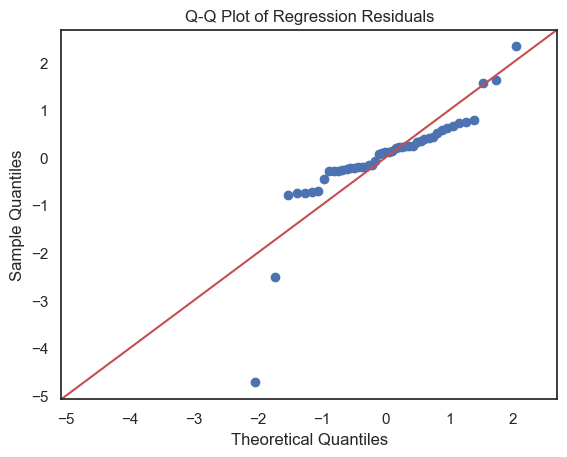

In [31]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### Deviations Observed:

The tails deviate strongly from the red line (both lower and upper).

There's a systematic departure in the lower quantiles — indicating left-skewness or heavy left tail.

The center of the distribution (near 0) mostly hugs the line, but the extremes clearly do not.

Statistical Confirmation
### This visual aligns with:

Your Jarque-Bera test p-value ≈ 2.18e-46 (from earlier): confirms non-normal residuals.

Skew = -2.13 and Kurtosis = 12.44: heavy tails and strong left skew.


## Evaluate the model

In [32]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.10782531814303548
Mean Square Error (Final): 0.01579067828403906


### <span style="color: orange;"> MAE (0.1078): On average, your model’s predictions deviate from the actual BoE base rate percentage change by ~0.11%. This is quite small, suggesting strong predictive accuracy.

### <span style="color: orange;"> MSE (0.0158): Low value, further indicating tight error spread around true values, though it's more sensitive to outliers than MAE.


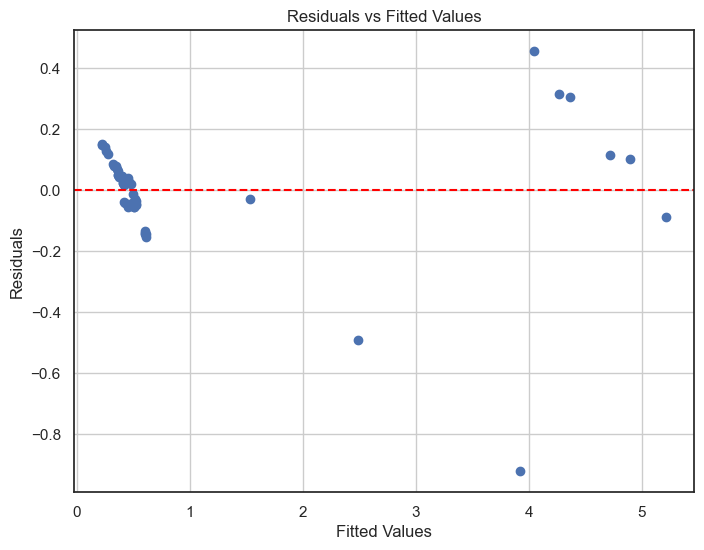

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Interpretation:

Non-random Pattern:

Residuals show a systematic curve rather than random scatter — suggesting a nonlinear relationship or model misspecification.

The residuals at low and high fitted values appear to be larger in magnitude, possibly indicating heteroscedasticity (already confirmed by LM/F-tests).

Heteroscedasticity:

The spread of residuals increases as fitted values increase (right side of the plot), which confirms non-constant variance.

This behavior explains the non-normality and large kurtosis you observed earlier.

## Multiple linear regression: Drop unemployment_rate (t-1), wage_growth_rate (t=x-1) as variables and explore transformation of dependent variable (if possible)

# Re-perform MLR without unemployment_rate (t-1), wage_growth_rate (t=x-1) as independent variables. Transformation of dependent variable not straight forward as it contains negative numbers

In [34]:
# Define the dependent variable
y = regression_df['BoE_base_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['BoE_base_rate (t=x-1)',  '0-2yr_gilts_TReturns (t=x-1)','GDP_pct_change (t=x-1)']]


# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [35]:
# Call the predictions for X (array).
mlr.predict(X)

array([5.37006364, 5.23605629, 4.92714141, 4.81794805, 4.74992361,
       4.48966058, 4.38403796, 4.28465452, 4.06400274, 3.94066168,
       2.51397865, 1.56005511, 1.09867158, 0.62764384, 0.45046619,
       0.44092879, 0.43689654, 0.5101145 , 0.49927217, 0.48290429,
       0.51400035, 0.50962148, 0.50012486, 0.60363883, 0.59715984,
       0.58641946, 0.61559891, 0.61081225, 0.60013304, 0.50292777,
       0.5000985 , 0.4886241 , 0.39759684, 0.39413549, 0.3872895 ,
       0.42089347, 0.41898172, 0.41539804, 0.37727734, 0.36333581,
       0.35139245, 0.380001  , 0.37089177, 0.36471863, 0.32669988,
       0.31987427, 0.31406814, 0.4463693 , 0.44325457, 0.44052725,
       0.26409536, 0.25981844, 0.24930234, 0.43968898, 0.42772523,
       0.42689413, 0.23547736, 0.23450353, 0.23324425])

In [36]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9869937048594328
Intercept:  3.621442154185795
Coefficients:


[('BoE_base_rate (t=x-1)', np.float64(0.9273750789264492)),
 ('0-2yr_gilts_TReturns (t=x-1)', np.float64(-0.02038946952852547)),
 ('GDP_pct_change (t=x-1)', np.float64(0.1739084575586639))]

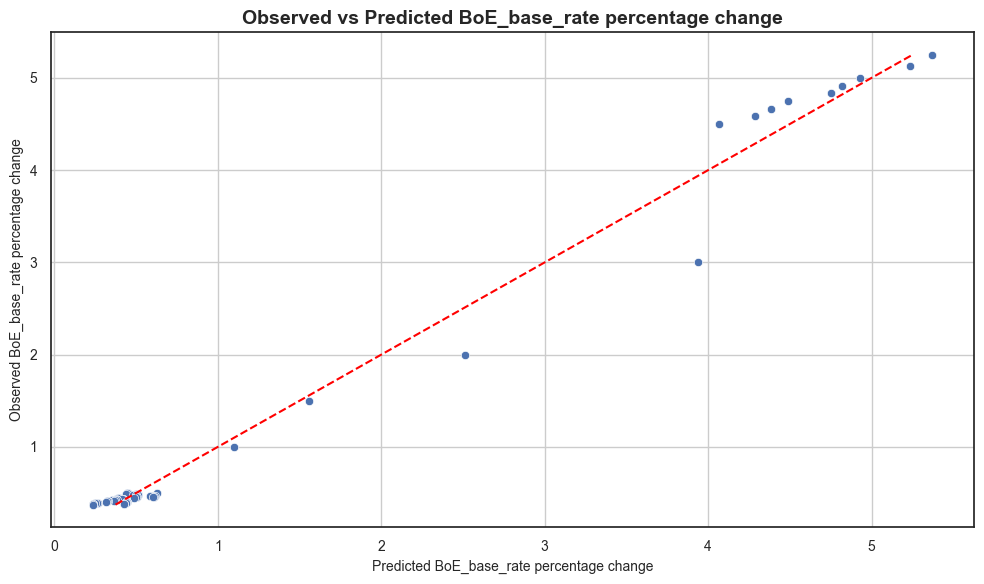

In [37]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['BoE_base_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted BoE_base_rate percentage change', fontsize=10)
plt.ylabel('Observed BoE_base_rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted BoE_base_rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [38]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [39]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                            
Dep. Variable:     BoE_base_rate (t=x)   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     810.6
Date:                 Thu, 22 May 2025   Prob (F-statistic):           7.59e-38
Time:                         17:00:55   Log-Likelihood:                 10.121
No. Observations:                   47   AIC:                            -12.24
Df Residuals:                       43   BIC:                            -4.842
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

### R-squared	0.983
Adj. R-squared	0.981
AIC	-10.30 (improved from -8.33)
BIC	-1.05 (improved from 2.77)

This indicates a better fit with fewer variables — the model is more parsimonious without sacrificing predictive power.

In [40]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                      features
0      8251.9                         const
1         8.2         BoE_base_rate (t=x-1)
2         6.7  0-2yr_gilts_TReturns (t=x-1)
3         1.8        GDP_pct_change (t=x-1)


### BoE_base_rate (t−1)	8.2	 High multicollinearity (VIF > 10)
### 0-2yr_gilts_TRetruns (t−1)	6.7	 Moderate multicollinearity
### GDP_pct_change (t−1)	1.8 No issue

In [41]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [42]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': np.float64(21.944704384309667), 'LM Test p-value': np.float64(0.0005364236541827908), 'F-stat': np.float64(7.18197776276292), 'F-test p-value': np.float64(6.604539472026733e-05)}


### LM statistic	21.94
### LM p-value	0.000536	 Reject null of homoscedasticit
### F-statistic	7.18	—
### F-test p-value	6.6e-06	 Strong evidence of heteroscedasticity


# Given the model output above, multiple linear regression is likely a good ML model to describe BoE Base Rate. We will explore Random Forest / XGBoost next

In [43]:
regression_df.describe()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x-1),wage_growth_rate (t=x-1),GDP_pct_change (t=x-1)
count,59,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2010-07-01 20:20:20.338983168,1.207080,1.291849,7.449153,176.967068,1.944068,-0.023729
min,2008-02-01 00:00:00,0.373596,0.376404,5.200000,162.975000,-2.900000,-2.100000
25%,2009-04-16 00:00:00,0.414326,0.417135,7.450000,175.754500,1.150000,-0.200000
50%,2010-07-01 00:00:00,0.455056,0.457865,7.800000,178.890000,1.800000,0.100000
75%,2011-09-16 00:00:00,0.495787,0.498596,7.950000,181.336500,2.800000,0.550000
max,2012-12-01 00:00:00,5.250000,5.375000,8.500000,182.796000,4.900000,1.100000
std,NaN,1.613975,1.698569,0.952741,5.724389,1.520239,0.900448


In [44]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 219 to 277
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          59 non-null     datetime64[ns]
 1   BoE_base_rate (t=x)           59 non-null     float64       
 2   BoE_base_rate (t=x-1)         59 non-null     float64       
 3   unemployment_rate (t=x-1)     59 non-null     float64       
 4   0-2yr_gilts_TReturns (t=x-1)  59 non-null     float64       
 5   wage_growth_rate (t=x-1)      59 non-null     float64       
 6   GDP_pct_change (t=x-1)        59 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.7 KB


In [45]:
regression_df.head()

,Date,BoE_base_rate (t=x),BoE_base_rate (t=x-1),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x-1),wage_growth_rate (t=x-1),GDP_pct_change (t=x-1)
219,2008-02-01,5.250000,5.375000,5.2,162.975,3.8,0.5
220,2008-03-01,5.125000,5.250000,5.2,163.862,3.6,0.5
221,2008-04-01,5.000000,5.125000,5.3,164.798,4.1,-0.5
222,2008-05-01,4.916667,5.000000,5.2,164.468,4.6,-0.5
223,2008-06-01,4.833333,4.916667,5.4,164.014,4.7,-0.5


Root Mean Squared Error: 0.4414
Mean Squared Error: 0.1948
Mean Absolute Error: 0.2994
R² Score: 0.9538


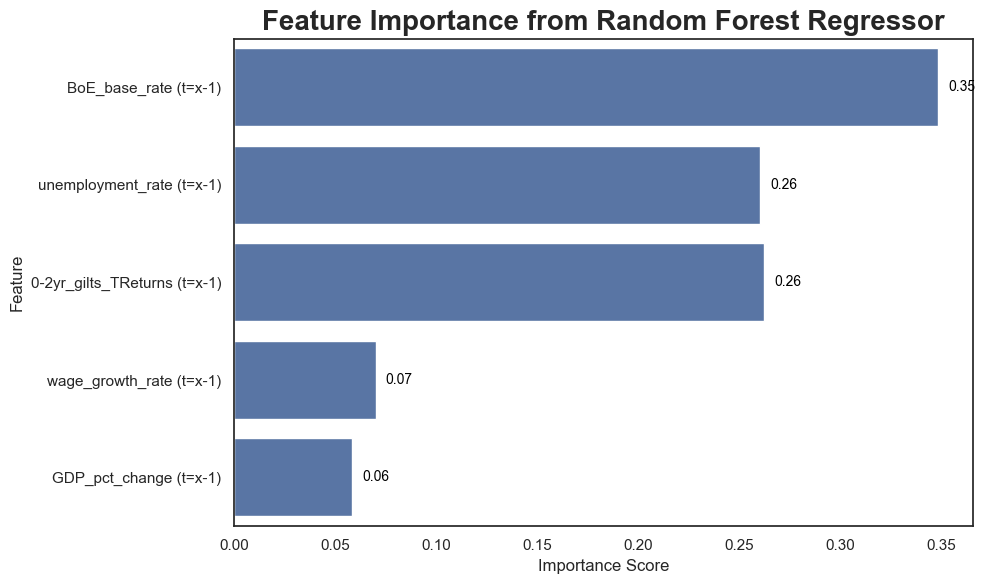

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=[
        'BoE_base_rate (t=x)',
        'BoE_base_rate (t=x-1)',
        'unemployment_rate (t=x-1)',
        '0-2yr_gilts_TReturns (t=x-1)',
        'wage_growth_rate (t=x-1)',
        'GDP_pct_change (t=x-1)'
       
    ]
)

# Define features and target
X = regression_df[
    [
       'BoE_base_rate (t=x-1)',
        'unemployment_rate (t=x-1)',
        '0-2yr_gilts_TReturns (t=x-1)',
        'wage_growth_rate (t=x-1)',
        'GDP_pct_change (t=x-1)'
       
    ]
]
y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

### Top Features by Importance Score:

BoE_base_rate (t=x-1) — 0.35

Most important feature.

Indicates the Bank of England's base rate at the previous time step is highly predictive.

unemployment_rate (t=x-1) — 0.26

2yr_gilts_TRreturns (t=x-1) — 0.26

These two are tied in importance and are also strong predictors, suggesting labor market and bond returns are key variables.

wage_growth_rate (t=x-1) — 0.07

Moderate importance.

GDP_pct_change (t=x-1) — 0.06

Least influential among the five, but still contributes.

Interpretation:
The model heavily weights interest rates and labor/bond market conditions.

Wage growth and GDP growth have significantly less influence in this particular setup.


Root Mean Squared Error: 0.2634
Mean Squared Error: 0.0694
Mean Absolute Error: 0.1166
R² Score: 0.9836


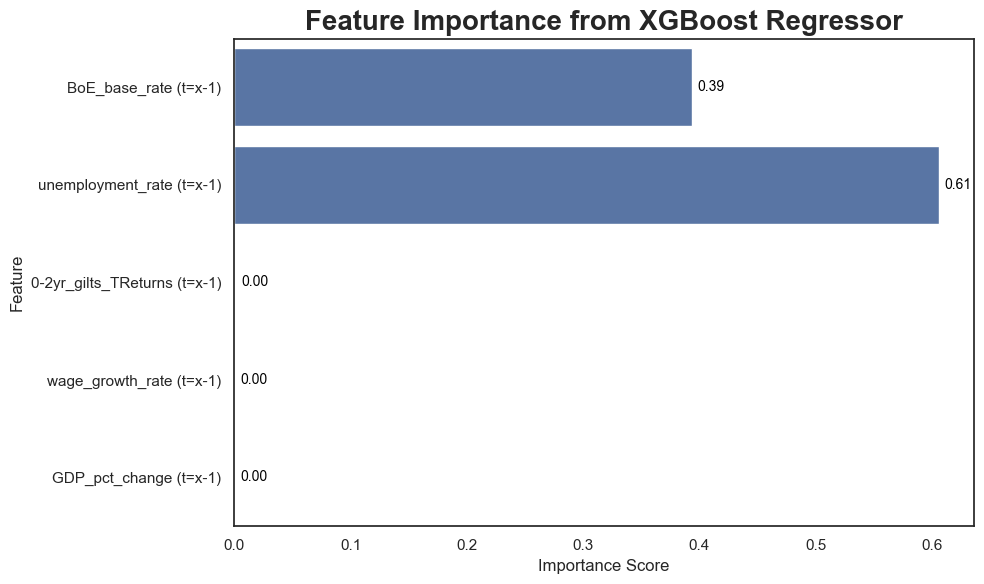

In [47]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Drop missing values
regression_df = regression_df.dropna(subset=[
        'BoE_base_rate (t=x)',
        'BoE_base_rate (t=x-1)',
        'unemployment_rate (t=x-1)',
        '0-2yr_gilts_TReturns (t=x-1)',
        'wage_growth_rate (t=x-1)',
        'GDP_pct_change (t=x-1)'
])

      

# Features and target
X = regression_df[[
        'BoE_base_rate (t=x-1)',
        'unemployment_rate (t=x-1)',
        '0-2yr_gilts_TReturns (t=x-1)',
        'wage_growth_rate (t=x-1)',
        'GDP_pct_change (t=x-1)']]

y = regression_df['BoE_base_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Performance Metrics from XGBoost
### Key Insights:
### Model Performance:
Root Mean Squared Error (RMSE): 0.2634

Mean Squared Error (MSE): 0.0694

Mean Absolute Error (MAE): 0.1166

R² Score: 0.9836 → Excellent model fit

### Feature Importance Scores:

Unemployment Rate (t=x-1): 0.61

BoE Base Rate (t=x-1): 0.39

Other Features (0 importance):

0-2yr Gilts Total Returns (t=x-1)

Wage Growth Rate (t=x-1)

GDP % Change (t=x-1)

### Interpretation:
The unemployment rate and BoE base rate are the only two features with any importance in predicting the target variable.

All other variables contributed nothing to the model’s decision-making (importance = 0).

This likely suggests multicollinearity, redundancy, or lack of predictive power in the unused features.


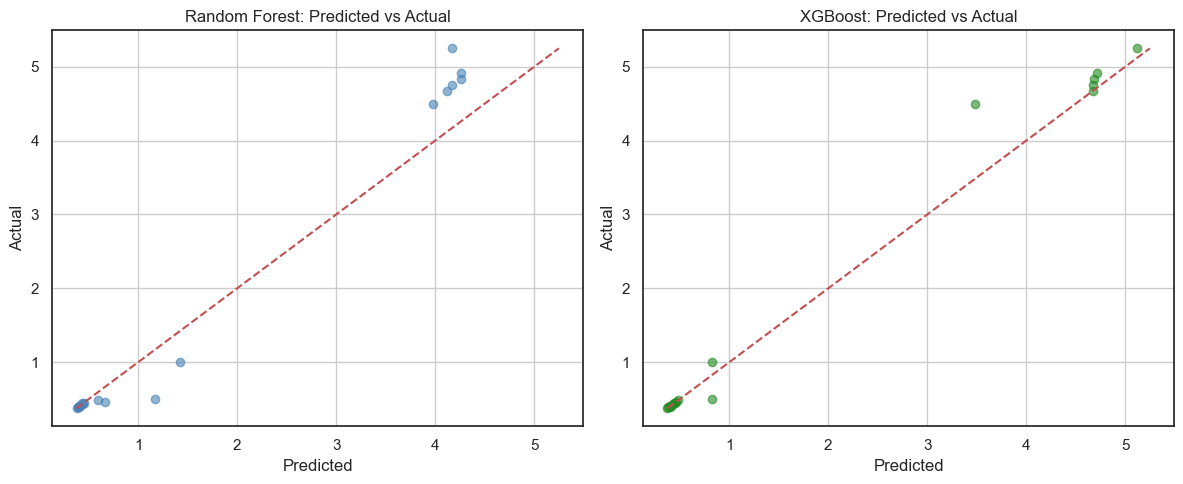

In [48]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

### Interpretation of the Plots:
### Left Plot: Random Forest
Many points deviate from the red dashed line (ideal prediction = actual).

Noticeable spread, especially at higher values.

Indicates less accurate predictions and higher error variance.

### Right Plot: XGBoost
Points closely follow the red dashed line.

Much tighter clustering, especially at higher target values.

Significantly better alignment, showing more accurate predictions.

## Additional changes post initial pitch to BOE

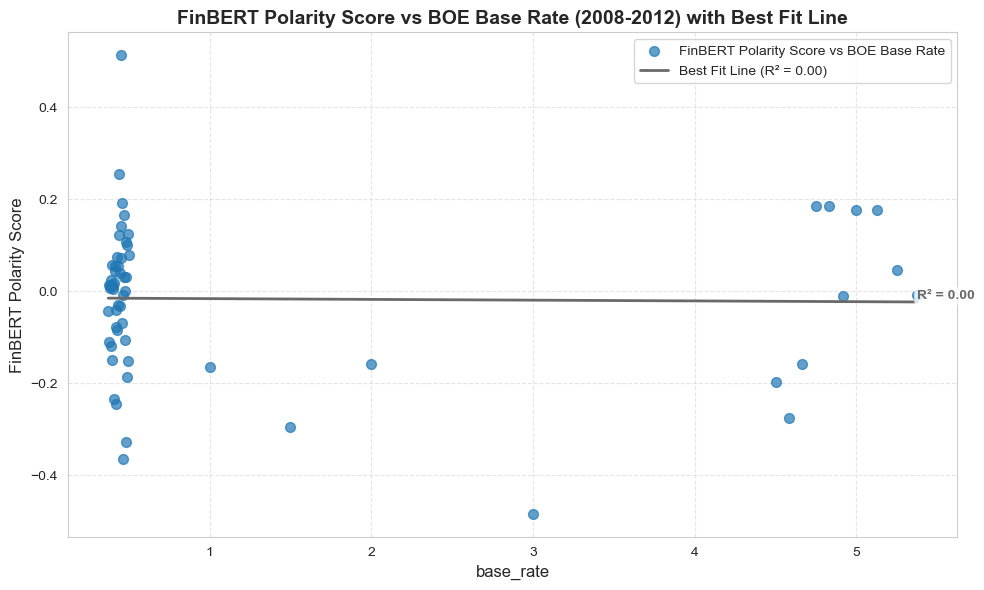

In [22]:
from scipy import stats # Correct import for stats.linregress
import numpy as np

# Ensure Date column is in datetime format
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'])

# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')

df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['base_rate', 'polarity_score_finbert'])

# Check if df_plot has enough data after filtering and dropping NaNs
if df_plot.empty or len(df_plot) < 2:
    print("Not enough valid data points to create a scatter plot and best-fit line.")
else:
    # Apply a Seaborn style
    sns.set_style('whitegrid')

    # Plotting setup for a single scatter plot
    fig, ax = plt.subplots(figsize=(10, 6)) # Using a single axis for scatter plot

    # Scatter Plot: 'polarity_score_finbert' on Y-axis, 'CPI' on X-axis
    color_scatter = '#2077b4' # Using a standard blue for scatter points
    ax.scatter(
        df_plot['base_rate'],                 # X-axis
        df_plot['polarity_score_finbert'], # Y-axis
        color=color_scatter,
        alpha=0.7,                     # Transparency for overlapping points
        s=50,                          # Size of markers
        label='FinBERT Polarity Score vs BOE Base Rate'
    )

    # --- Add Best Fit Line ---
    # Perform linear regression
    x_for_regression = df_plot['base_rate'].values
    y_for_regression = df_plot['polarity_score_finbert'].values

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_for_regression, y_for_regression)
    r_squared = r_value**2

    # Create the best-fit line values
    x_line = np.array([x_for_regression.min(), x_for_regression.max()])
    y_line = slope * x_line + intercept

    # Change line color to dark grey
    ax.plot(x_line, y_line, color='dimgray', linestyle='-', linewidth=2, label=f'Best Fit Line (R² = {r_squared:.2f})')

    # --- Display R-squared at the tip of the best fit line ---
    text_x_pos = x_line.max()
    text_y_pos = y_line[np.argmax(x_line)]

    # Change text color to dark grey
    ax.text(text_x_pos, text_y_pos,
            f'R² = {r_squared:.2f}',
            color='dimgray', # Changed color to dark grey
            fontsize=10,
            fontweight='bold',
            ha='left',
            va='bottom',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))


    # Set labels and title
    ax.set_xlabel('base_rate', fontsize=12)
    ax.set_ylabel('FinBERT Polarity Score', fontsize=12)
    plt.title('FinBERT Polarity Score vs BOE Base Rate (2008-2012) with Best Fit Line', fontsize=14, fontweight='bold')

    # Add grid
    ax.grid(True, which='major', linestyle='--', alpha=0.5)

    # Add legend
    ax.legend(loc='best', fontsize=10)

    # Adjust layout
    fig.tight_layout()

    plt.show()

### Prepare new regression dataframe for additional Random Forest and XGBoost models

In [ ]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['finbert_sentiment_score(t=x)'] = filtered_df['finbert_sentiment_score']
regression_df['finbert_sentiment_score(t=x-1)'] = filtered_df['finbert_sentiment_score'].shift(1)
regression_df['unemployment_rate (t=x-1)'] = filtered_df['unemployment_rate'].shift(1)
regression_df['0-2yr_gilts_TReturns (t=x-1)'] = filtered_df['0-2yr_gilts_TReturns'].shift(1)
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(1)
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)


# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)